In [46]:
# Import all the required libraries 

from glob import glob
import mne
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy
from scipy import signal
from scipy import fftpack
import pywt
import os,sys
from scipy.signal import coherence

In [47]:
file1 = "F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\H1_EC_pre.edf"

file2 = "F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\H1_EC_post.edf"

raw1 = mne.io.read_raw_edf(file1, preload=True, exclude=['EEG VREF'])
raw2 = mne.io.read_raw_edf(file2, preload=True, exclude=['EEG VREF'])


Extracting EDF parameters from F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\H1_EC_pre.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 334499  =      0.000 ...   334.499 secs...


Extracting EDF parameters from F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\H1_EC_post.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300499  =      0.000 ...   300.499 secs...


In [48]:
print(raw1.info)
print(raw2.info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG 1, EEG 2, EEG 3, EEG 4, EEG 5, EEG 6, EEG 7, EEG 8, EEG 9, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2022-04-14 01:45:16 UTC
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG 1, EEG 2, EEG 3, EEG 4, EEG 5, EEG 6, EEG 7, EEG 8, EEG 9, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2022-04-14 02:08:11 UTC
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>


In [49]:
raw1.crop(tmin=5, tmax=300)
raw2.crop(tmin=5, tmax=300)

<RawEDF | H1_EC_post.edf, 64 x 295001 (295.0 s), ~144.1 MB, data loaded>

In [50]:
alpha_freq = [8, 13]
alpha1 = raw1.copy().filter(8, 13)
alpha2 = raw2.copy().filter(8, 13)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1651 samples (1.651 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 1651 samples (1.651 s)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.5s finished


In [51]:
freq1 = alpha1.compute_psd(fmin = 8, fmax = 13)
freq2 = alpha2.compute_psd(fmin = 8, fmax = 13)
print(type(freq1))

Effective window size : 2.048 (s)


Effective window size : 2.048 (s)
<class 'mne.time_frequency.spectrum.Spectrum'>


In [52]:
freq1.get_data().mean(axis = 1).mean(axis=0)

1.1750080177278745e-11

In [53]:
freq2.get_data().mean(axis = 1).mean(axis=0)

1.4009960155109372e-11

C:\Users\kvvde\AppData\Local\Temp\ipykernel_27920\1058268469.py:1: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  freq1.plot()
C:\Users\kvvde\AppData\Local\Temp\ipykernel_27920\1058268469.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  freq1.plot()
c:\Users\kvvde\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


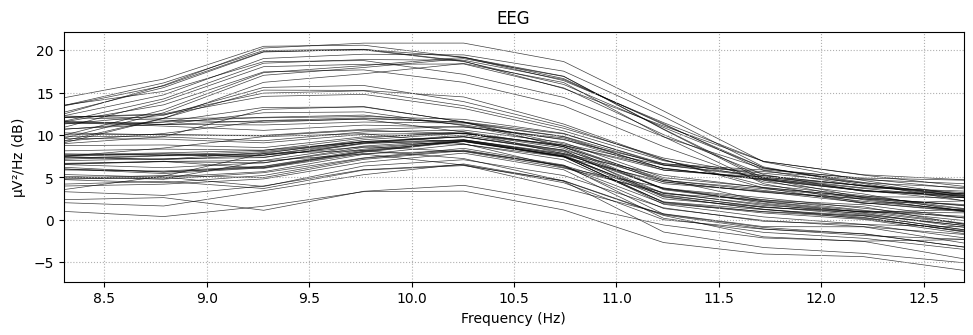

In [54]:
freq1.plot()

C:\Users\kvvde\AppData\Local\Temp\ipykernel_27920\2381092511.py:1: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  freq2.plot()
C:\Users\kvvde\AppData\Local\Temp\ipykernel_27920\2381092511.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  freq2.plot()
c:\Users\kvvde\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


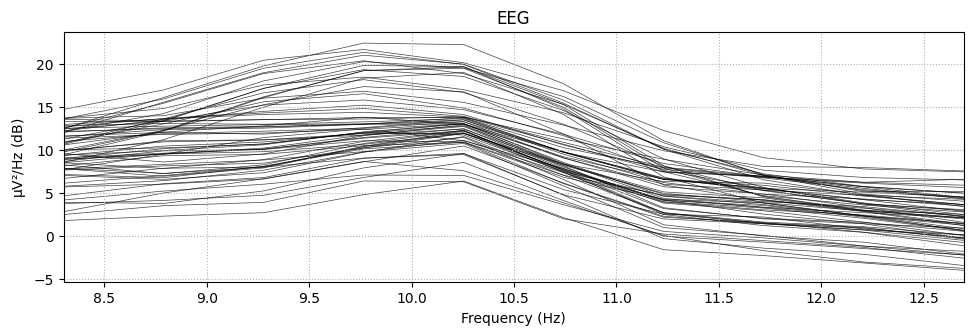

In [55]:
freq2.plot()